# What is Gradient Descent?

### Author: Frankie Cancino

## Overview

This tutorial is on the basics of gradient descent. It is also a continuation of the Intro to Machine Learning post, "What is Machine Learning?", which can be found [here.](https://medium.com/swlh/what-is-machine-learning-ff27b518909b)

### So what is gradient descent?

Gradient descent is a method of finding the optimal weights for a model. In our case, gradient is the slope of the error we calculate when testing out our machine learning model. While descent, is the attempt to minimize this error by incrementally stepping in the right direction. A common explanation of gradient descent is the idea of standing on an uneven baseball field, blindfolded, and you want to find the lowest point of the field. Naturally, you will use your feet to inch your way to the lowest point on the field. Looking for any downward slope. Conceptually, this is what we are doing to minimize our error and find our best performing machine learning model.

### How does this relate to our y = mx + b equation in the first tutorial?

We can calculate derivatives, our error, and update our weights (a.k.a. `m` and `b`).

## Example

Let's get started. The only two libraries we will be using are numpy and matplotlib. Numpy is a great library for mathematical computations, whereas matplotlib is used for visualizations and graphing.

### Importing libraries we will be using

In [1]:
# Numpy is a powerful library in Python to do mathemetical computations
import numpy as np

# Importing matplotlib for visualizations
from matplotlib import pyplot as plt

### We can create some data that will follow this equation: `y = 4x + 2` where `m` = 4, `b` = 2

Since we know the ground truth, we can create some data that follows this equation. We can also compare our weights calculated using gradient descent to the ground truth, where m = 4 and b = 2.

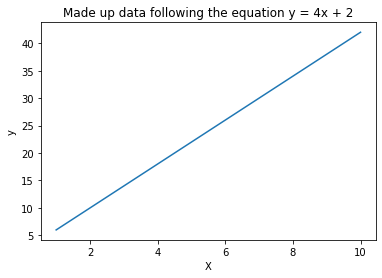

In [2]:
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([6, 10, 14, 18, 22, 26, 30, 34, 38, 42])

plt.plot(X, y)
plt.title('Made up data following the equation y = 4x + 2')
plt.ylabel('y')
plt.xlabel('X')
plt.show()

### Now let's create a Gradient Descent function in Python

In [3]:
def gradient_descent(x, y, learning_rate, steps):
    # Randomly initialize m and b. Here we set them to 0.
    m = b = 0
    
    # N is just the number of observations
    N = len(x)
    
    # Creating an empty list to plot how the error changes
    # over time later on with matplotlib.
    error_history = list()
    
    # Loop through the number of iterations specified to get closer to the optimal model
    for i in range(steps):
        # Since y = mx + b, we predict y is going to be m * x + b
        y_predicted = (m * x) + b
        
        # We calculate the error for each model we try, attempting to get the least amount of error possible
        # In this case we calculate the mean squared error (MSE)
        error = (1 / N) * sum([value ** 2 for value in (y - y_predicted)])
        # Append to the error history, so we can visualize later
        error_history.append(error)
        
        # Calculate the partial derivatives for m and b
        dm = (-2 / N) * sum(x * (y - y_predicted))
        db = (-2 / N) * sum((y - y_predicted))
        
        # Update m and b based on the partial derivatives and the specified learning rate
        m = m - learning_rate * dm
        b = b - learning_rate * db
        
        # Print the step number, error, and weights
        print(f"Step {i + 1} \n Error = {error} \n m = {m} \n b = {b} \n")
        
    return m, b, error_history

### Let's break this function down

* First we set m and b equal to 0. This is to randomly intitialize these variables, you can set them to whatever value you want.
* Then we find how many data points we have and put that as variable `N`
* We create an empty array to save the history of the error (remember, error is the difference between what we predicted and the actual value)
* Finally, we create the gradient descent loop:
  * We calculate our predicted point which is y in mx + b. So, we end up with `y_predicted = mx + b`
  * We calculate the error for each point we predicted. In this case we use mean squared error (MSE). This is calculated by finding the error, then squaring it, and then taking the average of all of the squared errors.  
  * Then we add the MSE to the history array to visualize later.
  * Now, we do something very important and fundamental for the gradient descent algorithm - we calculate the partial derivatives for our weights. A partial derivative just holds the other variables constant while you figure out how the variable you are observing behaved during the process.
  * Then we update our weights `m` and `b` according to the partial derivatives and the learning rate we specified. (Learning rate is how large of a step you are taking)
  * Then finally we print out the values and return the variables.

_Formulas:_
  $$MSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2$$
  
  $$\frac{\partial}{\partial m} = \frac{-2}{N} \sum_{i=1}^{N} x (y_i - (m{x}_i + b)) $$
  
  $$\frac{\partial}{\partial b} = \frac{-2}{N} \sum_{i=1}^{N} (y_i - (m{x}_i + b)) $$

We can specify how many "steps" we want the gradient descent algorithm to run. Essentially, how many steps you are allowed to make on that baseball field while blindfolded.

In [4]:
steps = 5

We can also specify the "learning rate", which will tell us how big those steps are. Conceptually, think about how big of a step you are allowed to take, each time you take one on the baseball field. Too big of steps could cause you to over-shoot the lowest point of the field. However, too little of steps will make it take longer for you to find the lowest point. This variable becomes more widely talked about in deep learning. For now we will set it to 0.01.

In [5]:
learning_rate = 0.01

Now let's run our made-up data through gradient descent and see what `m` and `b` values pop out.

In [6]:
m, b, error_history = gradient_descent(X, y, learning_rate, steps)

Step 1 
 Error = 708.0 
 m = 3.3000000000000003 
 b = 0.48 

Step 2 
 Error = 32.8794 
 m = 4.0062 
 b = 0.5873999999999999 

Step 3 
 Error = 1.9005793800000028 
 m = 4.1568119999999995 
 b = 0.6149699999999999 

Step 4 
 Error = 0.4759406616840016 
 m = 4.18842006 
 b = 0.62542128 

Step 5 
 Error = 0.40731798550902065 
 m = 4.194540273 
 b = 0.6321866478 



Notice, the error continues to decrease and `m` approaches 4 while `b` approaches 2. If we increase the number of steps the algorithm is allowed to take, it will get even closer to the real values.

In [7]:
steps = 10
m, b, error_history = gradient_descent(X, y, learning_rate, steps)

Step 1 
 Error = 708.0 
 m = 3.3000000000000003 
 b = 0.48 

Step 2 
 Error = 32.8794 
 m = 4.0062 
 b = 0.5873999999999999 

Step 3 
 Error = 1.9005793800000028 
 m = 4.1568119999999995 
 b = 0.6149699999999999 

Step 4 
 Error = 0.4759406616840016 
 m = 4.18842006 
 b = 0.62542128 

Step 5 
 Error = 0.40731798550902065 
 m = 4.194540273 
 b = 0.6321866478 

Step 6 
 Error = 0.4009385900344457 
 m = 4.1952037315320005 
 b = 0.638143484814 

Step 7 
 Error = 0.3974420855790127 
 m = 4.19470107492282 
 b = 0.6439082046491998 

Step 8 
 Error = 0.3941047048606723 
 m = 4.193951344720837 
 b = 0.6496129223147056 

Step 9 
 Error = 0.39080125244398833 
 m = 4.1931513878311755 
 b = 0.6552860159491194 

Step 10 
 Error = 0.38752576100510977 
 m = 4.1923433574467674 
 b = 0.6609336429687077 



You can see with more steps, we get closer to the real `m` and `b` values of 4 and 2!

### Let's take a look at how the error changed after each step

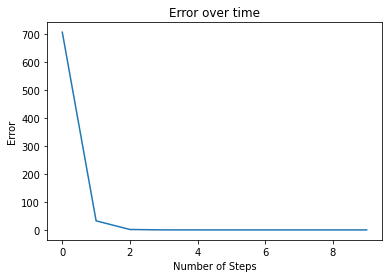

In [8]:
plt.plot(range(steps), error_history)
plt.title('Error over time')
plt.ylabel('Error')
plt.xlabel('Number of Steps')
plt.show()

As we can see, it sharply declines and gets better. Then it slowly gets better. You will see this type of plot often when training deep learning or other machine learning models.

### Now let's look at the line the gradient descent algorithm came up with, plotted with the actual line.

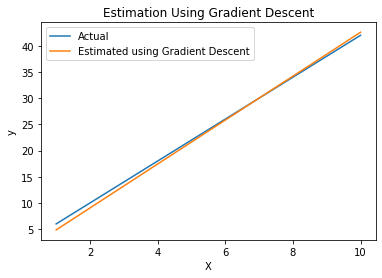

In [9]:
y_predicted = (m * X) + b

plt.plot(X, y)
plt.plot(X, y_predicted)
plt.title('Estimation Using Gradient Descent')
plt.ylabel('y')
plt.xlabel('X')
plt.legend(["Actual", "Estimated using Gradient Descent"])
plt.show()

We can see the gradient descent algorithm did a pretty good job! If we allowed gradient descent to run even longer, it would be able to lineup even closer to the actual function in this plot.

## Summary

To conclude, gradient descent is an algorithm to optimize a machine learning model. It attempts to find the best weights for the model, in order to approximate a function found in data. Over time, the errors will (hopefully) decrease and accuracy will increase. In order to do this, the gradient descent algorithm calculates the partial derivatives of the weights. These partial derivatives tell the algorithm in which direction to update the weights. While the learning rate tells us how large of a step the weights are allowed to take, in the direction given by the partial derivatives.

## Bio

Frankie Cancino is a Senior AI Scientist for Target, living in the San Francisco Bay Area, and the founder of the Data Science Minneapolis group.

### Links
* [What is Machine Learning?](https://medium.com/swlh/what-is-machine-learning-ff27b518909b)
* [LinkedIn](https://www.linkedin.com/in/frankie-cancino/)
* [Twitter](https://twitter.com/frankiecancino)